## Import libraries and Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-products-dataset/amazon_products.csv
/kaggle/input/amazon-products-dataset/amazon_categories.csv


In [2]:
df_categories=pd.read_csv('/kaggle/input/amazon-products-dataset/amazon_categories.csv')
df_categories.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [3]:
df_categories

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies
...,...,...
243,262,"Xbox Series X & S Consoles, Games & Accessories"
244,263,PC Games & Accessories
245,264,Baby Girls' Clothing & Shoes
246,265,Boys' School Uniforms


In [4]:
df_products=pd.read_csv('/kaggle/input/amazon-products-dataset/amazon_products.csv')
df_products.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


## Merging the datasets and performing EDA

In [5]:
df = pd.merge(df_products, df_categories, left_on = 'category_id', right_on = 'id')

df

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,104,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,104,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,104,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,104,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,104,Suitcases
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0,112,Men's Accessories
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0,112,Men's Accessories
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0,112,Men's Accessories
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0,112,Men's Accessories


In [6]:
df.drop('id',
  axis='columns', inplace=True)

In [7]:
df.describe(include='all')

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
count,1426337,1426336,1426337,1426337,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1426337,1.426337e+06,1426337
unique,1426337,1385430,1372162,1426337,NaN,NaN,NaN,NaN,NaN,2,NaN,248
top,B014TMV5YE,Men's Sneaker,https://m.media-amazon.com/images/I/01RmK+J4pJ...,https://www.amazon.com/dp/B014TMV5YE,NaN,NaN,NaN,NaN,NaN,False,NaN,Girls' Clothing
freq,1,89,1130,1,NaN,NaN,NaN,NaN,NaN,1417817,NaN,28619
mean,NaN,NaN,NaN,NaN,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,NaN,1.419823e+02,NaN
std,NaN,NaN,NaN,NaN,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,NaN,8.362720e+02,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,NaN,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,NaN,0.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,NaN,5.000000e+01,NaN


## Uncover trending product categories and their sales performance.

In [8]:
# df.plot(x='category_name', y='boughtInLastMonth', kind='line')
x = df.groupby('category_name')['boughtInLastMonth'].sum().sort_values(ascending=False)[:5]
trending_prod = x.index

<Axes: xlabel='category_name'>

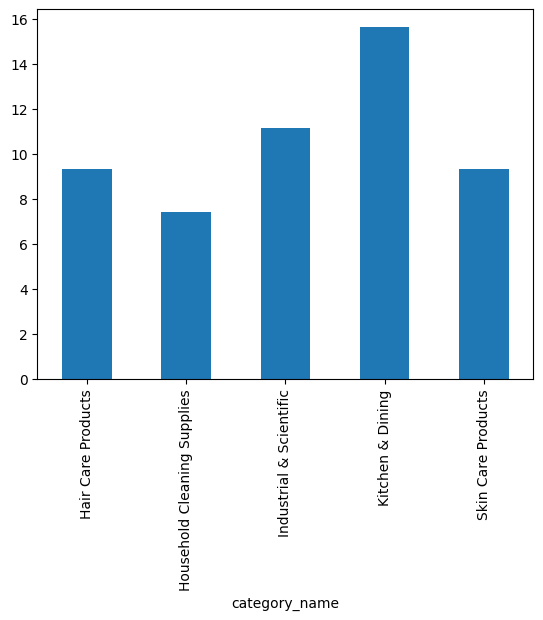

In [9]:
y = df.loc[df['category_name'].isin(trending_prod),['category_name','listPrice']]
y.groupby('category_name')['listPrice'].mean().plot(kind = 'bar')

## Analyze customer ratings to find top-rated products.

In [10]:
cond = df['reviews'].sort_values(ascending=False)!=0
df[cond]

/tmp/ipykernel_18/1021529857.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond]


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
46968,B08XWVX62X,Eureka NEC185 Cordless Stick Vacuum Cleaner Co...,https://m.media-amazon.com/images/I/716X0z1KIL...,https://www.amazon.com/dp/B08XWVX62X,4.1,27918,152.99,169.99,175,False,600,Vacuum Cleaners & Floor Care
46969,B009ZJ2M7G,Hoover Power Scrub Deluxe Carpet Cleaner Machi...,https://m.media-amazon.com/images/I/71zMtxB9xT...,https://www.amazon.com/dp/B009ZJ2M7G,4.5,47104,181.36,239.99,175,False,4000,Vacuum Cleaners & Floor Care
46970,B07PN7DPKX,Prolux Core Floor Buffer - Heavy Duty Single P...,https://m.media-amazon.com/images/I/71+t-F84jD...,https://www.amazon.com/dp/B07PN7DPKX,4.2,497,499.99,549.99,175,False,200,Vacuum Cleaners & Floor Care
46971,B091SWWH59,Eureka PowerSpeed Bagless Upright Vacuum Clean...,https://m.media-amazon.com/images/I/7114a8aLdc...,https://www.amazon.com/dp/B091SWWH59,4.4,14469,99.99,0.00,175,True,3000,Vacuum Cleaners & Floor Care
46972,B005KMDV9A,Shark NV356E Navigator Lift-Away Professional ...,https://m.media-amazon.com/images/I/61OsbGCnrq...,https://www.amazon.com/dp/B005KMDV9A,4.5,34651,199.99,0.00,175,False,5000,Vacuum Cleaners & Floor Care
...,...,...,...,...,...,...,...,...,...,...,...,...
1204948,B07K8CNPF2,"Microfiber Car Wax Applicator Pad, Round + Rec...",https://m.media-amazon.com/images/I/41wjjAR9f6...,https://www.amazon.com/dp/B07K8CNPF2,4.0,46,13.87,0.00,19,False,0,Car Care
1204949,B072M1C78B,uxcell 2 Pcs U-Shape Tire Waxing Polishing Spo...,https://m.media-amazon.com/images/I/61q8wOEElv...,https://www.amazon.com/dp/B072M1C78B,3.8,34,9.19,0.00,19,False,0,Car Care
1204951,B091SV2K2J,Compatible with 1PCS Carbon Fiber Engine Start...,https://m.media-amazon.com/images/I/61WR4woHCe...,https://www.amazon.com/dp/B091SV2K2J,3.5,44,9.96,0.00,19,False,0,Car Care
1204952,B014ONABDO,Shurhold - Dual Action Polisher Pro Accessorie...,https://m.media-amazon.com/images/I/71V7ZsrJXx...,https://www.amazon.com/dp/B014ONABDO,4.5,12,17.99,0.00,19,False,0,Car Care


<Axes: xlabel='category_name'>

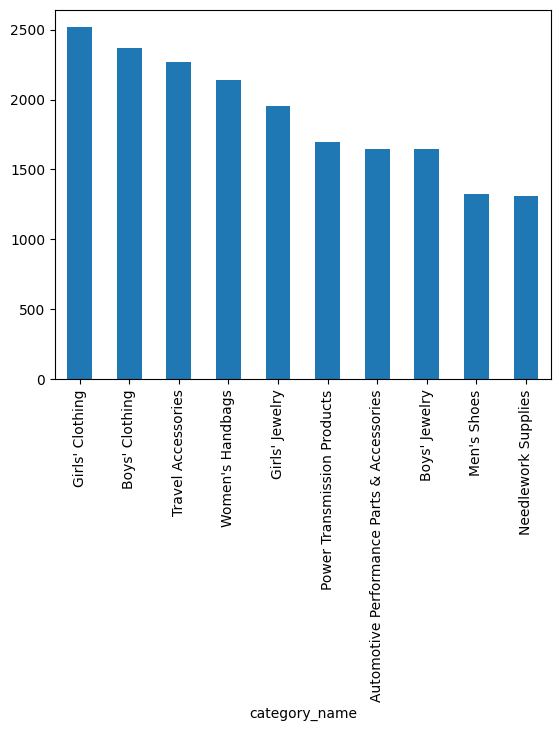

In [11]:
# df.plot(x='category_name', y='boughtInLastMonth', kind='line')
# x = df.groupby('category_name')['boughtInLastMonth'].sum().sort_values(ascending=False)[:5]
# trending_prod = x.index
df1 = df[df['stars']==5.0]
df1.groupby('category_name')['reviews'].count().sort_values(ascending=False)[:10].plot(kind = 'bar')

## Train a product title generator that can generate sales-worthy product titles based on products with the most sales.

In [12]:
df[df['boughtInLastMonth']==100000].sort_values(by='boughtInLastMonth', ascending=False)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
331036,B07MHJFRBJ,"Bounty Quick Size Paper Towels, White, 8 Famil...",https://m.media-amazon.com/images/I/81t6ws1HsW...,https://www.amazon.com/dp/B07MHJFRBJ,4.8,0,24.42,0.00,167,True,100000,Household Cleaning Supplies
331037,B074CR89QG,Amazon Brand - Presto! Flex-a-Size Paper Towel...,https://m.media-amazon.com/images/I/718xN2kSZ1...,https://www.amazon.com/dp/B074CR89QG,4.7,0,28.28,0.00,167,False,100000,Household Cleaning Supplies
331038,B00DU5SRIY,Stardrops - The Pink Stuff - The Miracle All P...,https://m.media-amazon.com/images/I/618lU3sYc4...,https://www.amazon.com/dp/B00DU5SRIY,4.4,0,4.99,5.97,167,True,100000,Household Cleaning Supplies
331040,B09BWFX1L6,"Amazon Basics 2-Ply Paper Towels, Flex-Sheets,...",https://m.media-amazon.com/images/I/61POocZniq...,https://www.amazon.com/dp/B09BWFX1L6,4.2,0,22.86,0.00,167,False,100000,Household Cleaning Supplies
466031,B09LH36816,"Hismile v34 Colour Corrector, Tooth Stain Remo...",https://m.media-amazon.com/images/I/51VlG-Mz7c...,https://www.amazon.com/dp/B09LH36816,3.4,0,20.69,29.00,126,True,100000,Oral Care Products
1009205,B084HQ4DYQ,LMNT Zero-Sugar Electrolytes - Variety Salt - ...,https://m.media-amazon.com/images/I/71Pr1-qwwM...,https://www.amazon.com/dp/B084HQ4DYQ,4.5,0,25.00,0.00,136,False,100000,Sports Nutrition Products
1016564,B01N05APQY,"Nespresso Capsules VertuoLine, Medium and Dark...",https://m.media-amazon.com/images/I/61J0e7d0GE...,https://www.amazon.com/dp/B01N05APQY,4.8,0,37.50,0.00,170,False,100000,Kitchen & Dining
1016566,B0748J34WZ,"Dixie Paper Plates, 8 1/2 inch, Dinner Size Pr...",https://m.media-amazon.com/images/I/814WEkpf3-...,https://www.amazon.com/dp/B0748J34WZ,4.8,0,5.99,6.89,170,True,100000,Kitchen & Dining
1070592,B00T0C9XRK,essence | Lash Princess False Lash Effect Masc...,https://m.media-amazon.com/images/I/61K6cQhw4E...,https://www.amazon.com/dp/B00T0C9XRK,4.3,346563,4.99,0.00,48,True,100000,Makeup
1227843,B00PBX3L7K,COSRX Snail Mucin 96% Power Repairing Essence ...,https://m.media-amazon.com/images/I/51IF5kpotS...,https://www.amazon.com/dp/B00PBX3L7K,4.6,0,15.00,25.00,52,True,100000,Personal Care Products


In [13]:
df2 = df[['title', 'boughtInLastMonth']].groupby('title')['boughtInLastMonth'].sum().sort_values(ascending = False).head(20)
df2

title
Neutrogena Cleansing Fragrance Free Makeup Remover Face Wipes, Cleansing Facial Towelettes for Waterproof Makeup, Alcohol-Free, Unscented, 100% Plant-Based Fibers, Twin Pack, 2 x 25 ct               108000
Stardrops - The Pink Stuff - The Miracle All Purpose Cleaning Paste                                                                                                                                    100000
COSRX Snail Mucin 96% Power Repairing Essence 3.38 fl.oz 100ml, Hydrating Serum for Face with Snail Secretion Filtrate for Dull & Damaged Skin, Not Tested on Animals, No Parabens, Korean Skincare    100000
LMNT Zero-Sugar Electrolytes - Variety Salt - Hydration Powder Packets | No Artificial Ingredients | Keto & Paleo Friendly | 12 Sticks                                                                 100000
Nespresso Capsules VertuoLine, Medium and Dark Roast Coffee, Variety Pack, Stormio, Odacio, Melozio, 30 Count, Brews 7.77 Fl Oz (Pack of 3 )                              

In [14]:
px.bar(df2)

## Gain insight into the best price for any given product based on sales data and competition.

In [15]:
df

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,Suitcases
...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0,Men's Accessories
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0,Men's Accessories
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0,Men's Accessories
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0,Men's Accessories


In [16]:
df[['boughtInLastMonth', 'category_name']]

,boughtInLastMonth,category_name
0,2000,Suitcases
1,1000,Suitcases
2,300,Suitcases
3,400,Suitcases
4,400,Suitcases
...,...,...
1426332,0,Men's Accessories
1426333,0,Men's Accessories
1426334,0,Men's Accessories
1426335,0,Men's Accessories


In [17]:
a = df[df['listPrice']!=0]
a['price'] = a['listPrice']
a

/tmp/ipykernel_18/3580202676.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,209.99,209.99,104,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,429.99,429.99,104,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,354.37,354.37,104,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,309.99,309.99,104,False,400,Suitcases
8,B08BXBCNMQ,Omni 2 Hardside Expandable Luggage with Spinne...,https://m.media-amazon.com/images/I/91eOWP4myS...,https://www.amazon.com/dp/B08BXBCNMQ,4.5,0,137.04,137.04,104,False,500,Suitcases
...,...,...,...,...,...,...,...,...,...,...,...,...
1426323,B07MTD2CZR,Anchor Embroidered Cotton Washed Dad Hat Distr...,https://m.media-amazon.com/images/I/61vTP-WCL8...,https://www.amazon.com/dp/B07MTD2CZR,4.5,0,15.98,15.98,112,False,0,Men's Accessories
1426326,B00J4EWR5O,Men's Ox3173 Barrelhouse Rectangular Prescript...,https://m.media-amazon.com/images/I/51QfLDJnab...,https://www.amazon.com/dp/B00J4EWR5O,4.8,0,229.00,229.00,112,False,0,Men's Accessories
1426329,B09KNMWWYF,2 Pairs Butterfly Sunglasses Butterfly Rimless...,https://m.media-amazon.com/images/I/61x0W4iLoR...,https://www.amazon.com/dp/B09KNMWWYF,4.5,0,10.99,10.99,112,False,0,Men's Accessories
1426331,B00BW8URU2,1178 Genuine Leather Mens Slim Key Case Wallet...,https://m.media-amazon.com/images/I/51VARC6euL...,https://www.amazon.com/dp/B00BW8URU2,3.9,0,22.99,22.99,112,False,0,Men's Accessories


In [18]:
b = df[df['listPrice']==0]
c = pd.concat([a,b]).sort_index()
c

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,209.99,209.99,104,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,429.99,429.99,104,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,354.37,354.37,104,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,309.99,309.99,104,False,400,Suitcases
...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0,Men's Accessories
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0,Men's Accessories
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0,Men's Accessories
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,57.39,57.39,112,False,0,Men's Accessories


In [19]:
df3=df[['price', 'boughtInLastMonth', 'category_name']].sort_values(by='boughtInLastMonth',ascending=False)[:25]
df3

,price,boughtInLastMonth,category_name
1016564,37.50,100000,Kitchen & Dining
331040,22.86,100000,Household Cleaning Supplies
1009205,25.00,100000,Sports Nutrition Products
1227843,15.00,100000,Personal Care Products
1227844,11.97,100000,Personal Care Products
1227845,10.27,100000,Personal Care Products
466031,20.69,100000,Oral Care Products
331036,24.42,100000,Household Cleaning Supplies
331037,28.28,100000,Household Cleaning Supplies
331038,4.99,100000,Household Cleaning Supplies


In [20]:
df3.loc[df3['category_name']=='Kitchen & Dining', ['price']]

,price
1016564,37.50
1016566,5.99
1016568,37.50
1016567,2.99
1016569,28.30


<Axes: xlabel='price', ylabel='category_name'>

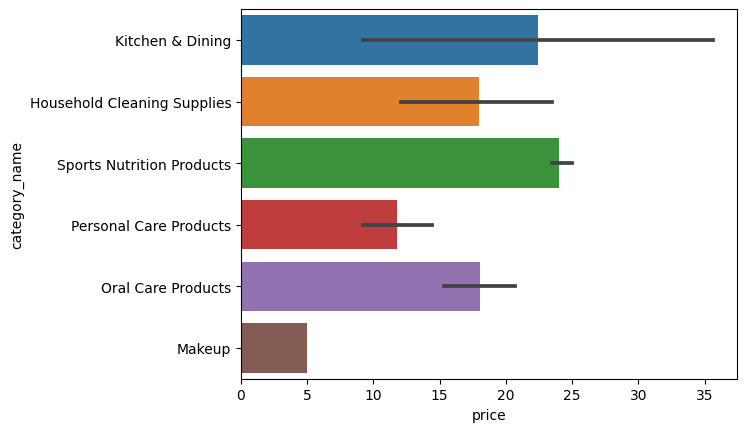

In [21]:
sns.barplot(x=df3['price'],y=df3['category_name'])

In [22]:
df4=df[['price', 'boughtInLastMonth']].sort_values(by='boughtInLastMonth',ascending=False)[:25]
df4

,price,boughtInLastMonth
1016564,37.50,100000
331040,22.86,100000
1009205,25.00,100000
1227843,15.00,100000
1227844,11.97,100000
1227845,10.27,100000
466031,20.69,100000
331036,24.42,100000
331037,28.28,100000
331038,4.99,100000


<Axes: xlabel='price', ylabel='boughtInLastMonth'>

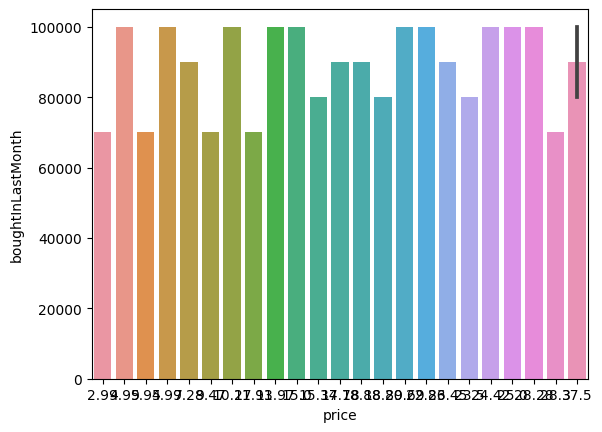

In [23]:
sns.barplot(x=df4['price'],y=df4['boughtInLastMonth'])

## Identify which niches are the easiest to make sales in.

In [24]:
df5=df[['title', 'boughtInLastMonth']][:10]
df5

,title,boughtInLastMonth
0,"Sion Softside Expandable Roller Luggage, Black...",2000
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,1000
2,Platinum Elite Softside Expandable Checked Lug...,300
3,Freeform Hardside Expandable with Double Spinn...,400
4,Winfield 2 Hardside Expandable Luggage with Sp...,400
5,Maxlite 5 Softside Expandable Luggage with 4 S...,500
6,"Hard Shell Carry on Luggage Airline Approved, ...",400
7,"Maxporter II 30"" Hardside Spinner Trunk Luggag...",100
8,Omni 2 Hardside Expandable Luggage with Spinne...,500
9,Luggage Sets Expandable Lightweight Suitcases ...,200


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



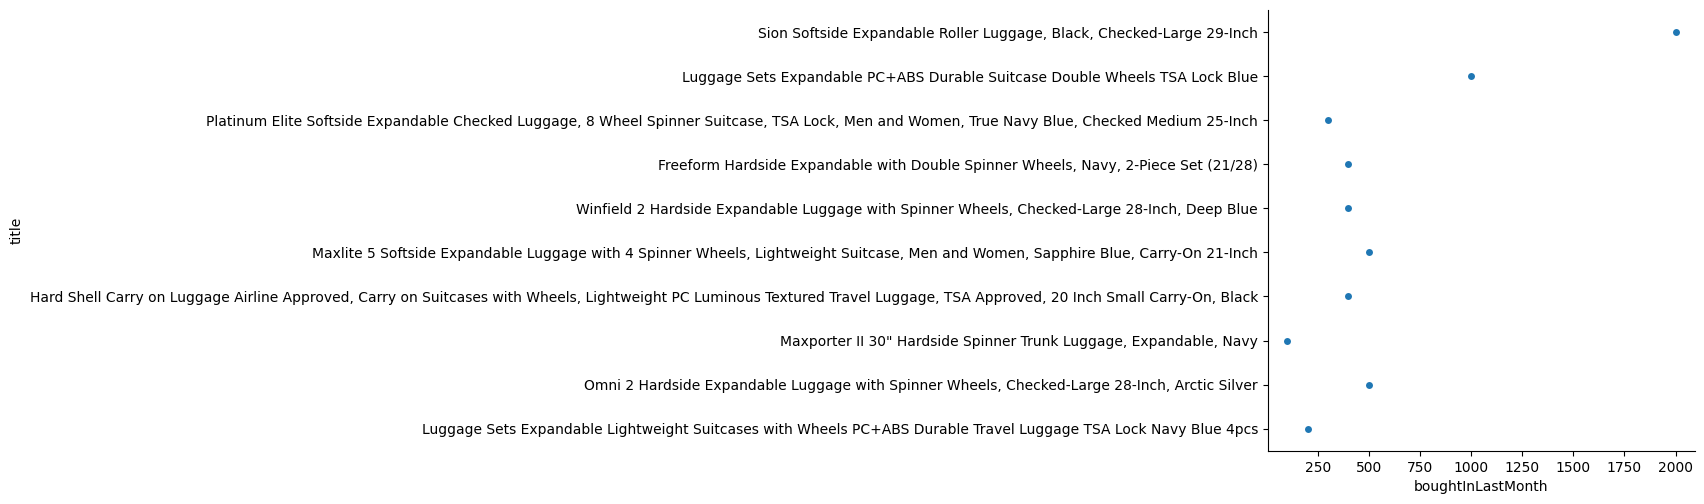

In [25]:
sns.catplot(x=df5['boughtInLastMonth'], y=df5['title'])

## Gain insights into the general spending habits of online shoppers.

In [26]:
df6=df[['price', 'category_name', 'boughtInLastMonth']].sort_values(by='boughtInLastMonth',ascending=False)[:50]
df6

,price,category_name,boughtInLastMonth
1016564,37.50,Kitchen & Dining,100000
331040,22.86,Household Cleaning Supplies,100000
1009205,25.00,Sports Nutrition Products,100000
1227843,15.00,Personal Care Products,100000
1227844,11.97,Personal Care Products,100000
1227845,10.27,Personal Care Products,100000
466031,20.69,Oral Care Products,100000
331036,24.42,Household Cleaning Supplies,100000
331037,28.28,Household Cleaning Supplies,100000
331038,4.99,Household Cleaning Supplies,100000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



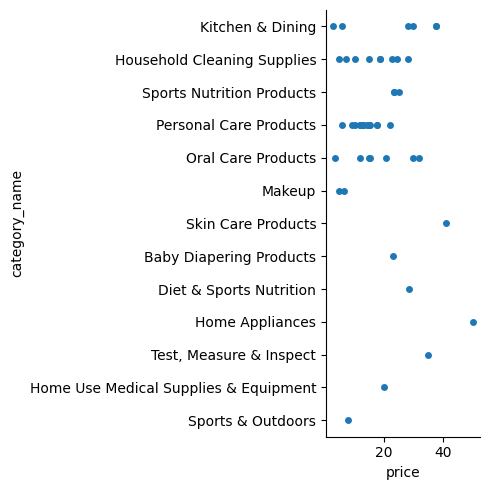

In [27]:
sns.catplot(data=df6, x='price', y='category_name', jitter=False)

In [28]:
df7=df[df['boughtInLastMonth']>0]
df8=df7[['price', 'category_name', 'boughtInLastMonth']].sort_values(by='price',ascending=False)[:50]
df8

,price,category_name,boughtInLastMonth
118265,3199.00,Office Electronics,50
117730,2999.00,Office Electronics,100
885626,2995.00,GPS & Navigation,50
884224,2539.00,Beading & Jewelry Making,50
383149,2314.99,Computers,50
118084,2299.00,Office Electronics,50
811424,2275.00,Welding & Soldering,50
804100,2121.03,Home Storage & Organization,100
118512,2099.99,Office Electronics,50
1355055,2080.50,"Test, Measure & Inspect",100


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



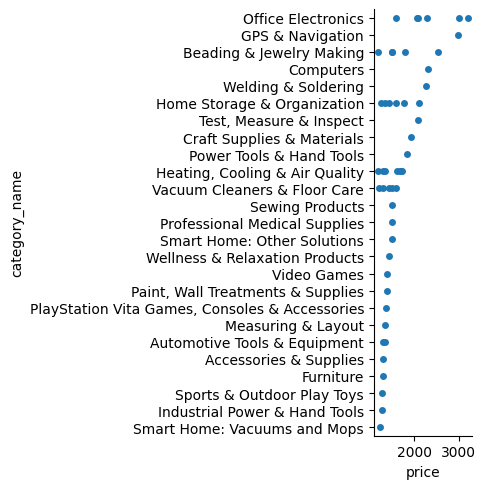

In [29]:
sns.catplot(data=df8, x='price', y='category_name', jitter=False)